# Final Assignment

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `data` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [3]:
food = pd.read_csv('data/food_consumption.csv')
food.sample(10)

,country,food_category,consumption,co2_emission
1420,Bangladesh,poultry,1.40,1.50
1266,Nigeria,poultry,1.73,1.86
449,Belarus,soybeans,0.30,0.14
1244,Malawi,poultry,1.38,1.48
1272,Nigeria,wheat,20.82,3.97
475,New Caledonia,beef,16.07,495.89
1061,Malaysia,eggs,16.57,15.22
576,Ecuador,fish,5.17,8.25
731,Bosnia and Herzegovina,eggs,4.49,4.12
882,Slovakia,beef,5.19,160.15


In [4]:
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [6]:
food_description = food.groupby('food_category')['consumption'].describe()
food_description

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [7]:
highest_median_value = food_description[food_description['50%'] == food_description['50%'].max()].index[0]
print(f"The food category with the highest median value of food_consumption is: {highest_median_value}")

The food category with the highest median value of food_consumption is: dairy


In [8]:
food.describe().sort_values('consumption')

,consumption,co2_emission
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
mean,28.110406,74.383993
75%,28.132500,62.597500
std,49.818044,152.098566
max,430.760000,1712.000000
count,1430.000000,1430.000000


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

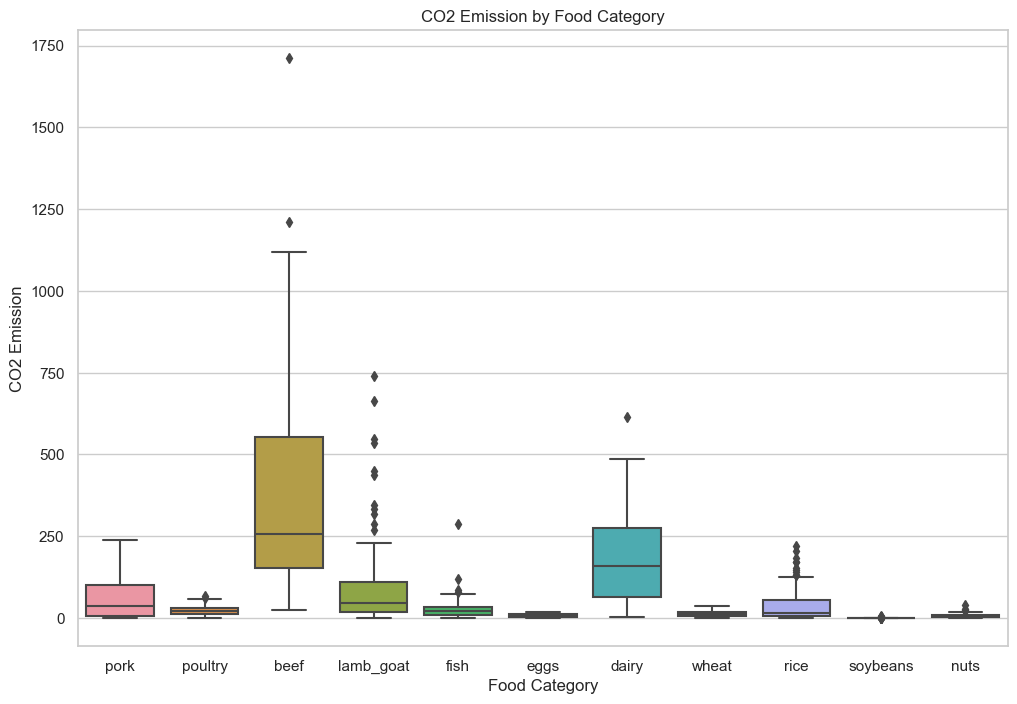

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='food_category', y='co2_emission', data=food)
plt.title('CO2 Emission by Food Category')
plt.xlabel('Food Category')
plt.ylabel('CO2 Emission')

plt.show()

In [10]:
print('Beef is the food_category that has the highest interquartile range')

Beef is the food_category that has the highest interquartile range


In [11]:
gbf = food.groupby('food_category')

for i, frame in gbf:
    iqr = frame.co2_emission.quantile(0.75) - frame.co2_emission.quantile(0.25)
    print(i, iqr)

beef 399.37749999999994
dairy 209.2725
eggs 7.6850000000000005
fish 25.27
lamb_goat 89.03750000000001
nuts 6.734999999999999
pork 92.52
poultry 20.230000000000004
rice 49.55
soybeans 0.29
wheat 12.645000000000001


3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [12]:
for i, frame in gbf:
    median = frame.co2_emission.quantile(0.5)
    print(i, median)

beef 255.655
dairy 158.075
eggs 7.734999999999999
fish 22.27
lamb_goat 46.405
nuts 6.1850000000000005
pork 36.650000000000006
poultry 21.325
rice 15.2
soybeans 0.035
wheat 13.24


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

### Permutation Test
A permutation test, also known as a randomization test, is a non-parametric statistical test used to assess the significance of a hypothesis. It works by shuffling the data and comparing the observed test statistic to a null distribution created from these permutations.

In [20]:
#create the two intervals of data to be compared
poultry = food.groupby("food_category").get_group("poultry")
poultry_cons = poultry.sample(100)["consumption"].values
fish = food.groupby("food_category").get_group("fish")
fish_cons = fish.sample(100)["consumption"].values

In [22]:
# Define your observed test statistic (e.g., mean difference)
observed_statistic = np.mean(fish_cons) - np.mean(poultry_cons)

# Combine the data from both groups into a single array
combined_data = np.concatenate((poultry_cons, fish_cons))

# Create an empty list to store the permuted test statistics
permuted_statistics = []

# Number of permutations (you can adjust as needed, but fewer permutations are used here)
num_permutations = 500

for _ in range(num_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)

    # Calculate the test statistic for the shuffled data
    shuffled_poultry = combined_data[:len(poultry_cons)]
    shuffled_fish = combined_data[len(fish_cons):]
    permuted_statistic = np.mean(shuffled_poultry) - np.mean(shuffled_fish)

    permuted_statistics.append(permuted_statistic)

# Calculate the p-value
p_value = (np.abs(permuted_statistics) >= np.abs(observed_statistic)).mean()
print(p_value)
# Make a decision based on the p-value (e.g., compare it to a significance level)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


0.428
Fail to reject the null hypothesis


#### We typically choose a level of hypothesis of 95% confidence in order to test the hypothesis. 
#### This means a p-value of 5%. If the p-value is less then 5% it means that the difference between the two means it is 
#### not due to simple chance but it is significative. Given that the p-value in this case is more than 0.05 (5%) it means that we fail to reject the 
#### null hypothesis i.e. that there is no significant difference between the two means

### Part 2

The `distributions.csv` dataset from the `data` folder contains data drawn from 7 probability distributions – one per column. Load it to a DataFrame named `distributions` and check its contents.

In [24]:
distributions = pd.read_csv('data/distributions.csv')
distributions.sample(10)

,distribution_1,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
663,False,100.017227,5.574829,898,1,-34,0.745577
493,False,99.970063,1.835615,899,0,-31,0.518819
116,False,100.002352,1.519488,918,2,-38,0.265786
633,False,100.020973,4.369405,897,0,-33,0.789282
818,False,100.004043,5.894007,908,3,-39,0.777774
80,False,99.994126,1.359701,915,2,-39,0.085863
817,False,100.007844,4.975212,909,1,-39,0.186296
46,False,99.999316,2.486439,896,1,-35,0.672223
609,False,100.006319,1.029851,894,0,-32,0.910147
677,False,99.993375,1.215063,906,2,-37,0.839247


1. Use the `.describe()` and `info()` methods on the `distributions` DataFrame to produce some preliminary information about each column. **What is the data type of each column?**

In [25]:
distributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distribution_1  1000 non-null   bool   
 1   distribution_2  1000 non-null   float64
 2   distribution_3  1000 non-null   float64
 3   distribution_4  1000 non-null   int64  
 4   distribution_5  1000 non-null   int64  
 5   distribution_6  1000 non-null   int64  
 6   distribution_7  1000 non-null   float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 48.0 KB


In [26]:
distributions.describe()

,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,100.000263,3.462706,899.630000,1.192000,-34.539000,0.513223
std,0.010155,1.466874,9.729531,1.091938,2.889087,0.497540
min,99.961668,1.002417,865.000000,0.000000,-39.000000,0.000033
25%,99.993916,2.223423,893.000000,0.000000,-37.000000,0.141789
50%,100.000598,3.426250,900.000000,1.000000,-34.000000,0.362279
75%,100.007031,4.679788,906.000000,2.000000,-32.000000,0.735851
max,100.034052,5.997595,929.000000,6.000000,-30.000000,3.039330


2. Loop through each column of `distributions` and for each column produce a plot to show the distribution on a separate chart.

In [27]:
def transform(x):
    if x == False:
        return 0
    else:
        return 1
distributions['distribution_1'] = distributions['distribution_1'].apply(lambda x: transform(x))

In [28]:
distributions.sample(5)

,distribution_1,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
438,0,99.993386,4.913907,901,2,-35,0.327121
285,0,99.978233,3.741620,896,1,-34,1.647113
14,0,100.002671,3.687924,902,3,-33,0.453254
729,0,100.023220,2.597519,902,2,-38,2.137052
315,0,100.004662,2.323494,892,1,-34,0.454178


In [29]:
distributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distribution_1  1000 non-null   int64  
 1   distribution_2  1000 non-null   float64
 2   distribution_3  1000 non-null   float64
 3   distribution_4  1000 non-null   int64  
 4   distribution_5  1000 non-null   int64  
 5   distribution_6  1000 non-null   int64  
 6   distribution_7  1000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


distribution_1


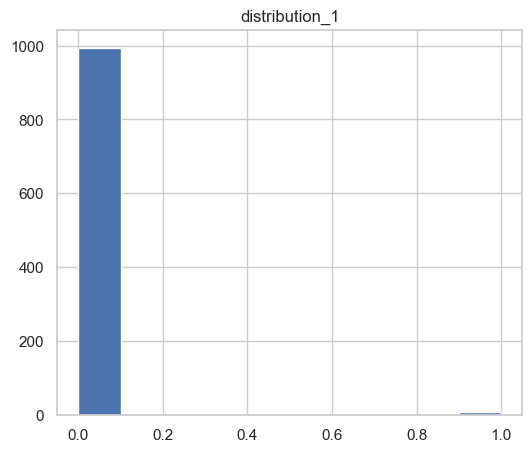

distribution_2


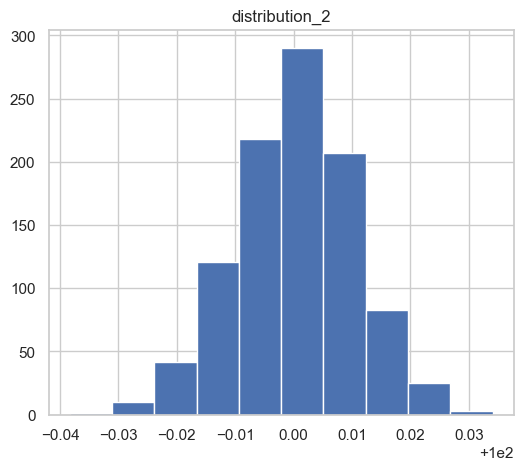

distribution_3


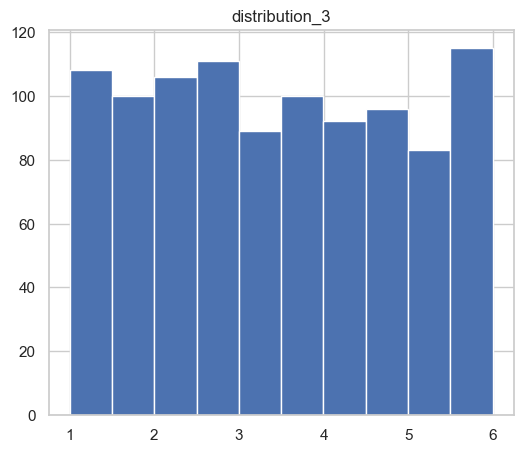

distribution_4


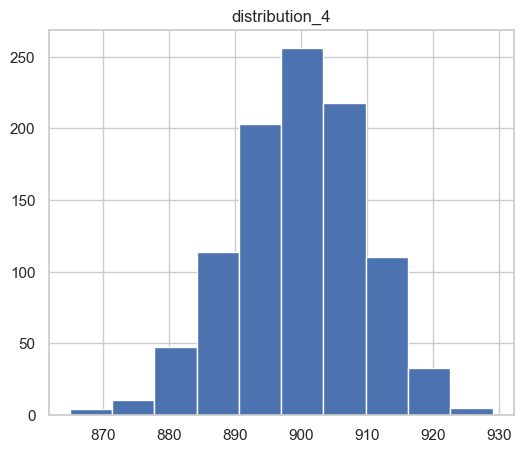

distribution_5


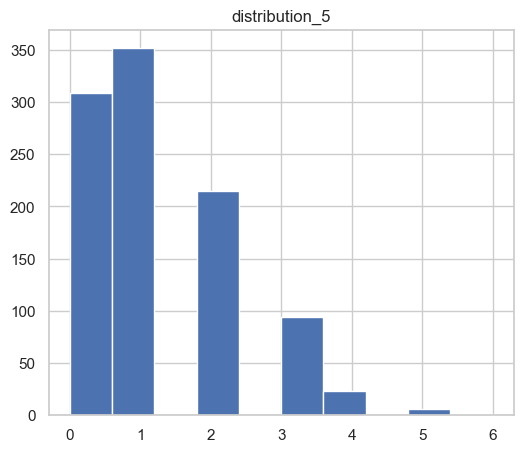

distribution_6


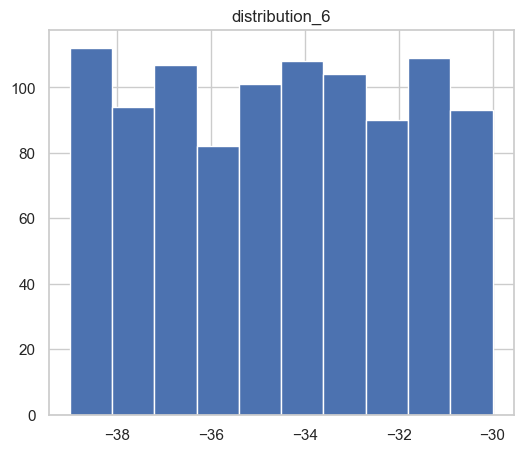

distribution_7


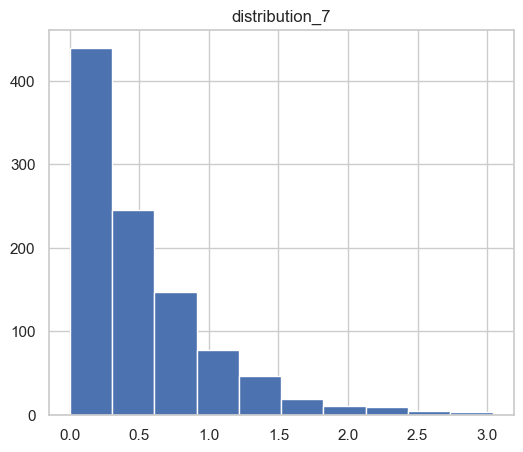

In [30]:
for i in distributions.columns:
    # if i == 'distribution_1': continue
    di = distributions[i]
    print(i)
    plt.figure(figsize=(6, 5))
    plt.title(i)
    plt.hist(di)
    plt.show()

3. Each column of the `distributions` dataframe contains data drawn from a different distribution. **Associate each column to its probability distribution.** This is the list of the probability distributions used (one for each column):
    - Bernoulli
    - Binomial
    - Continuous Uniform
    - Gaussian
    - Discrete Uniform
    - Poisson
    - Exponential (this was not explain in classroom, go by exclusion)

In [31]:
# Bernoulli = distributions_1
# Binomial = distributions_4
# Continuous Uniform = distributions_3
# Gaussian = distributions_2
# Discrete Uniform = distributions_6
# Poisson = istributions_5
# Exponential = distributions_7